In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
dataai="../data/WISDM_ar_v1.1/"
datapath = dataai
col_names = ['user', 'activity', 'timestamp', 'x-accel', 'y-accel', 'z-accel']

df = pd.read_csv(datapath+"WISDM_ar_v1.1_raw.txt",
                  header=None, names=col_names, delimiter=',', comment=';',
                    on_bad_lines='skip') #skip/warn bad lines
df.head()

,user,activity,timestamp,x-accel,y-accel,z-accel
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086471 entries, 0 to 1086470
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1086471 non-null  int64  
 1   activity   1086471 non-null  object 
 2   timestamp  1086471 non-null  int64  
 3   x-accel    1086471 non-null  float64
 4   y-accel    1086471 non-null  float64
 5   z-accel    1086470 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.7+ MB


In [17]:
df.describe()

,user,timestamp,x-accel,y-accel,z-accel
count,1.086471e+06,1.086471e+06,1.086471e+06,1.086471e+06,1.086470e+06
mean,1.883756e+01,3.250264e+13,6.641248e-01,7.246033e+00,3.976990e-01
std,1.026680e+01,4.893641e+13,6.876263e+00,6.739780e+00,4.761105e+00
min,1.000000e+00,0.000000e+00,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,1.000000e+01,1.999712e+12,-2.910000e+00,3.170000e+00,-2.220117e+00
50%,1.900000e+01,9.396153e+12,2.700000e-01,7.930000e+00,0.000000e+00
75%,2.800000e+01,3.509466e+13,4.440000e+00,1.156000e+01,2.720000e+00
max,3.600000e+01,2.093974e+14,1.995000e+01,2.004000e+01,1.961000e+01


In [18]:
df.groupby("activity").describe()

user                                                     \
               count       mean        std  min   25%   50%   75%   max   
activity                                                                  
Downstairs  100427.0  19.692254  10.016142  1.0  12.0  20.0  29.0  36.0   
Jogging     336447.0  18.715414  10.474173  1.0  10.0  19.0  27.0  36.0   
Sitting      59939.0  20.649877   9.629998  3.0  16.0  20.0  30.0  36.0   
Standing     48395.0  20.032049  10.167504  3.0  10.0  20.0  30.0  36.0   
Upstairs    122869.0  19.365495   9.641668  1.0  12.0  20.0  28.0  36.0   
Walking     418394.0  18.177797  10.369885  1.0   9.0  18.0  28.0  36.0   

           timestamp                ... y-accel          z-accel            \
               count          mean  ...     75%    max     count      mean   
activity                            ...                                      
Downstairs  100427.0  3.054520e+13  ...   11.45  20.04  100427.0  0.684080   
Jogging     336447.0  3.144371e+13  ...   13.33  20.04  336447.0 -0.150295   
Sitting      59939.0  4.581757e+13  ...    3.72  18.47   59939.0  6.559716   
Standing     48395.0  5.046419e+13  ...    9.81  19.46   48395.0  0.580193   
Upstairs    122869.0  3.447688e+13  ...   11.03  20.04  122869.0  0.323542   
Walking     418394.0  2.925916e+13  ...   12.15  20.04  418393.0 -0.112479   

                                                                  
                 std    min       25%       50%       75%    max  
activity                                                          
Downstairs  3.706798 -19.61 -1.438689  0.503953  2.750000  19.34  
Jogging     5.847274 -19.80 -3.530000 -0.310000  3.260000  19.61  
Sitting     3.735591 -10.80  5.710000  8.117727  8.920000  13.99  
Standing    1.376870  -4.14 -0.500000  0.650000  1.420000   7.25  
Upstairs    3.567884 -19.61 -1.688923  0.081722  2.070293  19.19  
Walking     4.018524 -19.38 -2.410000 -0.531194  1.650000  19.23  

[6 rows x 40 columns]

In [19]:
print(df["activity"].value_counts())
print("\n Percentage of each activity")
print(100*df["activity"].value_counts()/df.shape[0])

activity
Walking       418394
Jogging       336447
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: count, dtype: int64

 Percentage of each activity
activity
Walking       38.509449
Jogging       30.966956
Upstairs      11.309000
Downstairs     9.243413
Sitting        5.516852
Standing       4.454330
Name: count, dtype: float64


In [20]:
# Dropping the columns "timestamp" and "user"
df_expluded_time_user = df.drop(columns=["timestamp", "user"])
df_expluded_time_user.head()

,activity,x-accel,y-accel,z-accel
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


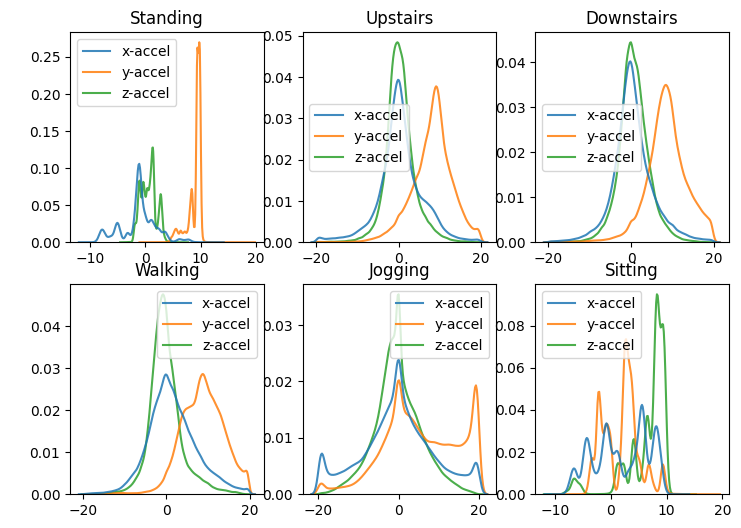

In [21]:
#Plotting the density distribution of each activity 
plt.figure(figsize=(8.5, 6))
for i, activity in enumerate(["Standing", "Upstairs", "Downstairs", "Walking", "Jogging", "Sitting" ]):
    plt.subplot(2, 3, i + 1)
    df_activity = df_expluded_time_user[df_expluded_time_user["activity"] == activity]
    sns.kdeplot(df_activity, alpha=0.85,  label=activity)
    plt.title(activity)
    plt.ylabel(" ")
# plt.legend()

plt.show()

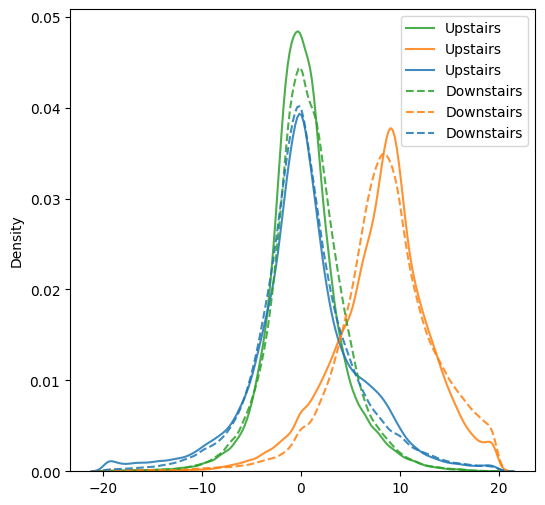

In [22]:
# Plotting the pair plot data for each activity
# Line styles to cycle through
line_styles = ['-', '--', ':', '-.', (0, (5, 10)), (5, (10, 2))]

plt.figure(figsize=(6, 6))
for i, activity in enumerate(["Upstairs", "Downstairs"]):
    df_activity = df_expluded_time_user[df_expluded_time_user["activity"] == activity]
    sns.kdeplot(df_activity, alpha=0.85, linestyle=line_styles[i], label=activity)
plt.legend()
plt.show()


In [26]:
# mean activity= upstrairs
for activity in df_expluded_time_user["activity"].unique():
    print("Activity=", activity)
    df_activity = df_expluded_time_user[df_expluded_time_user["activity"] == activity]

    print("mean x= ", df_activity["x-accel"].mean() , "std x= ", df_activity["x-accel"].std())
    print("mean y= ", df_activity["y-accel"].mean(), "std y= ", df_activity["y-accel"].std())
    print("mean z= ", df_activity["z-accel"].mean(), "std z= ", df_activity["z-accel"].std())
    print("----------")
   

Activity= Jogging
mean x=  -0.21909491813370302 std x=  9.16812015317763
mean y=  5.4340901049080355 std y=  9.216872550591829
mean z=  -0.1502949009219699 std z=  5.847273830040801
----------
Activity= Walking
mean x=  1.5459054621752126 std x=  5.825760450153115
mean y=  8.69501540367125 std y=  5.022417925992115
mean z=  -0.1124788506966943 std z=  4.018524066720522
----------
Activity= Upstairs
mean x=  0.38133398558523307 std x=  5.49527189758597
mean y=  8.111545417106758 std y=  4.890709166819653
mean z=  0.323542237509624 std z=  3.5678844186384224
----------
Activity= Downstairs
mean x=  0.4717183032641422 std x=  4.955947586210008
mean y=  8.600229839851297 std y=  4.90471585600188
mean z=  0.6840801024647356 std z=  3.7067977967686256
----------
Activity= Sitting
mean x=  1.8562698743722783 std x=  4.759027920904538
mean y=  1.8533737633260483 std y=  3.257750308766522
mean z=  6.5597164865751845 std z=  3.7355913227020143
----------
Activity= Standing
mean x=  -1.1782576712

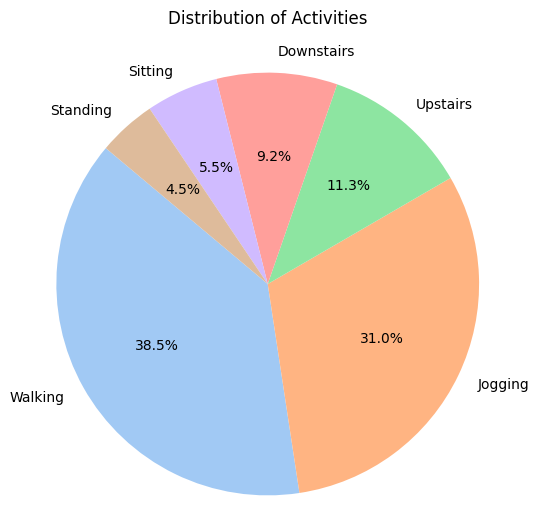

In [24]:
#Plotting the distribution of activities
plt.figure(figsize=(6, 6))

plt.pie(df["activity"].value_counts(), labels=df["activity"].value_counts().index,
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", n_colors=len(df["activity"].value_counts())))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Activities\n")
plt.show()